
# MNIST Dataset and Handwriting Recognition

### Rachel Conforti - ITCS 5156:  Applied Machine Learning 

# Goal 
The paper I am attempting to duplicate is Handwritten Digits Identification using Mnist Database Via Machine Learning Models. They used multiple types of models such as Support Vector Machine, Multilayer Perceptron, Decision Tree, Naïve Bayes, K-Nearest Neighbor, and Random Forest. I will attempt to use these models on the MNIST dataset as well and see if I can get a similar accuracy on them.


# Agenda
* Support Vector Machine
* Multilayer Perceptron
* Decision Tree
* Naïve Bayes
* K-Nearest Neighbor
* Random Forest

In [2]:
# Imports for the project
import sklearn # allows us to use all the library below!
from sklearn import neighbors # for knn
from sklearn import metrics # to allow us to do the classification report 
from sklearn.metrics import accuracy_score # to print out the accuracy
from sklearn import datasets # to import that dataset that sklearn has built in
from sklearn.model_selection import train_test_split # to train the MNIST dataset
from sklearn import svm # so we can so the support vector machine 
import matplotlib.pyplot as plt # so we plot the bar graph 
import numpy as np # used on the bar plot
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # Used for the confusion matrix at the end
sklearn.__version__ # I am running 1.0.2 
# %matplotlib inline

'1.0.2'

In [3]:
# loading in the dataset using the built in sklearn MNIST dataset
digits_dataset = datasets.load_digits()

In [4]:
# Training the data using train_test_split
X = digits_dataset.data
T= digits_dataset.target
X_train, X_test, t_train, t_test = train_test_split(X, T, test_size=0.25, shuffle=True)

In [5]:
display(X_train)

array([[ 0.,  0.,  4., ..., 10.,  1.,  0.],
       [ 0.,  0.,  6., ...,  6.,  0.,  0.],
       [ 0.,  0., 11., ...,  2.,  0.,  0.],
       ...,
       [ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  1., 11., ..., 13.,  3.,  0.],
       [ 0.,  6., 13., ...,  0.,  0.,  0.]])

In [6]:
X_test.shape

(450, 64)

In [5]:
t_test.shape

(1797,)

# Support Vector Machine

Train Accuracy: 0.9955456570155902, Test Accuracy: 0.9888888888888889

Classification report for classifier SVC():
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       0.98      1.00      0.99        45
           2       1.00      1.00      1.00        36
           3       1.00      0.98      0.99        49
           4       1.00      0.98      0.99        44
           5       0.98      1.00      0.99        48
           6       1.00      1.00      1.00        46
           7       1.00      1.00      1.00        47
           8       1.00      0.93      0.97        46
           9       0.93      1.00      0.96        41

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450




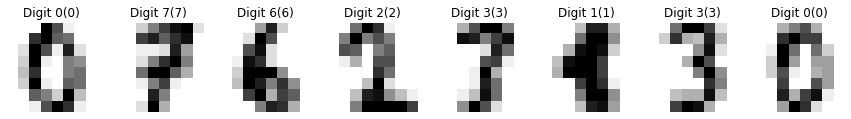

In [6]:
svm_classifier = svm.SVC()
svm_classifier.fit(X_train, t_train)

# Accuracy 
train_score_svm = svm_classifier.score(X_train, t_train)
test_score_svm = svm_classifier.score(X_test, t_test)
print("Train Accuracy: {}, Test Accuracy: {}".format(train_score_svm, test_score_svm))

predicted_svm = svm_classifier.predict(X_test)

# Print out of numbers 
k = 8
_, axes = plt.subplots(1, k, figsize=(15,3))
for ax, image, label, pred in zip(axes, X_test[:k], t_test[:k], predicted_svm):
    
    ax.set_axis_off()
    ax.imshow(image.reshape((8,8)), cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Digit {}({})'.format(label, pred))

# Report 
print("\nClassification report for classifier %s:\n%s\n" % (svm_classifier, metrics.classification_report(t_test, predicted_svm)))

# Multilayer Perceptron

Train Accuracy: 1.0, Test Accuracy: 0.9777777777777777

Classification report for classifier MLPClassifier(max_iter=350, random_state=1):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       0.96      0.96      0.96        45
           2       1.00      1.00      1.00        36
           3       1.00      0.94      0.97        49
           4       0.98      0.98      0.98        44
           5       0.94      1.00      0.97        48
           6       1.00      0.98      0.99        46
           7       1.00      1.00      1.00        47
           8       0.96      0.96      0.96        46
           9       0.95      0.98      0.96        41

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450




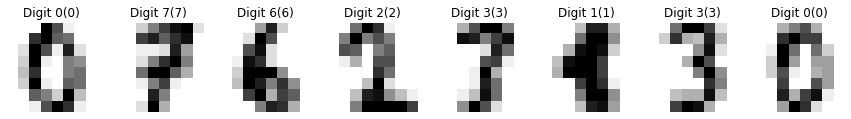

In [7]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=1, max_iter=350)
mlp.fit(X_train, t_train)

train_score_mlp = mlp.score(X_train, t_train)
test_score_mlp = mlp.score(X_test, t_test)
print("Train Accuracy: {}, Test Accuracy: {}".format(train_score_mlp, test_score_mlp))

predicted_mlp = mlp.predict(X_test)

# Print out of numbers 
k = 8
_, axes = plt.subplots(1, k, figsize=(15,3))
for ax, image, label, pred in zip(axes, X_test[:k], t_test[:k], predicted_mlp):
    
    ax.set_axis_off()
    ax.imshow(image.reshape((8,8)), cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Digit {}({})'.format(label, pred))

# Report 
print("\nClassification report for classifier %s:\n%s\n" % (mlp, metrics.classification_report(t_test, predicted_mlp)))



# Decision Tree

Train Accuracy: 1.0, Test Accuracy: 0.8466666666666667

Classification report for classifier DecisionTreeClassifier():
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        48
           1       0.76      0.76      0.76        45
           2       0.88      0.78      0.82        36
           3       0.91      0.88      0.90        49
           4       0.71      0.80      0.75        44
           5       0.89      0.98      0.93        48
           6       0.95      0.87      0.91        46
           7       0.84      0.81      0.83        47
           8       0.76      0.74      0.75        46
           9       0.80      0.88      0.84        41

    accuracy                           0.85       450
   macro avg       0.85      0.84      0.84       450
weighted avg       0.85      0.85      0.85       450




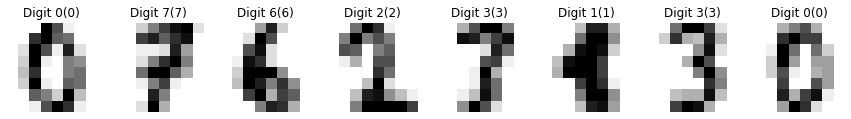

In [8]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(X_train, t_train)

train_score_dt = dt.score(X_train, t_train)
test_score_dt = dt.score(X_test, t_test)
print("Train Accuracy: {}, Test Accuracy: {}".format(train_score_dt, test_score_dt))

predicted_dt = dt.predict(X_test)

# Print out of numbers 
k = 8
_, axes = plt.subplots(1, k, figsize=(15,3))
for ax, image, label, pred in zip(axes, X_test[:k], t_test[:k], predicted_dt):
    
    ax.set_axis_off()
    ax.imshow(image.reshape((8,8)), cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Digit {}({})'.format(label, pred))

# Report 
print("\nClassification report for classifier %s:\n%s\n" % (dt, metrics.classification_report(t_test, predicted_dt)))



# Naïve Bayes

Train Accuracy: 0.8567186340014847, Test Accuracy: 0.8622222222222222

Classification report for classifier GaussianNB():
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        48
           1       0.87      0.87      0.87        45
           2       1.00      0.64      0.78        36
           3       0.84      0.84      0.84        49
           4       0.95      0.82      0.88        44
           5       0.84      0.90      0.87        48
           6       0.96      0.96      0.96        46
           7       0.78      0.96      0.86        47
           8       0.65      0.89      0.75        46
           9       1.00      0.68      0.81        41

    accuracy                           0.86       450
   macro avg       0.89      0.85      0.86       450
weighted avg       0.88      0.86      0.86       450




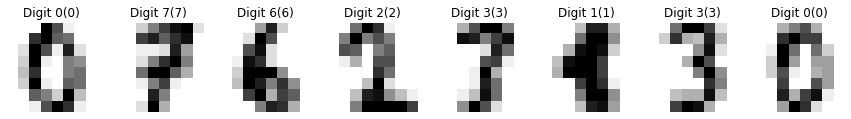

In [9]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train, t_train)

train_score_nb = nb.score(X_train, t_train)
test_score_nb = nb.score(X_test, t_test)
print("Train Accuracy: {}, Test Accuracy: {}".format(train_score_nb, test_score_nb))


predicted_nb = nb.predict(X_test)

# Print out of numbers 
k = 8
_, axes = plt.subplots(1, k, figsize=(15,3))
for ax, image, label, pred in zip(axes, X_test[:k], t_test[:k], predicted_nb):
    
    ax.set_axis_off()
    ax.imshow(image.reshape((8,8)), cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Digit {}({})'.format(label, pred))

# Report 
print("\nClassification report for classifier %s:\n%s\n" % (nb, metrics.classification_report(t_test, predicted_nb)))

# K-Nearest Neighbor

Train Accuracy: 0.9903489235337788, Test Accuracy: 0.9955555555555555

Classification report for classifier KNeighborsClassifier():
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       0.98      1.00      0.99        45
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        49
           4       1.00      1.00      1.00        44
           5       1.00      1.00      1.00        48
           6       0.98      1.00      0.99        46
           7       1.00      1.00      1.00        47
           8       1.00      0.96      0.98        46
           9       1.00      1.00      1.00        41

    accuracy                           1.00       450
   macro avg       1.00      1.00      1.00       450
weighted avg       1.00      1.00      1.00       450




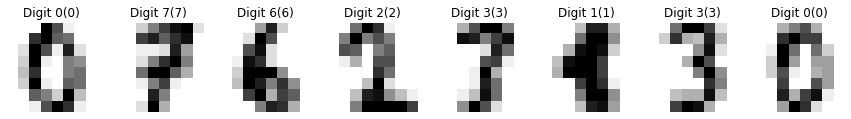

In [10]:
# Create an KNN classifier using default setting
knn = neighbors.KNeighborsClassifier()

# Train with training data (input, X_train and target, t_train)
knn.fit(X_train, t_train)

# Accuracy 
train_score_knn = knn.score(X_train, t_train)
test_score_knn = knn.score(X_test, t_test)
print("Train Accuracy: {}, Test Accuracy: {}".format(train_score_knn, test_score_knn))

predicted_knn = knn.predict(X_test)

# Print out of numbers 
k = 8
_, axes = plt.subplots(1, k, figsize=(15,3))
for ax, image, label, pred in zip(axes, X_test[:k], t_test[:k], predicted_knn):
    
    ax.set_axis_off()
    ax.imshow(image.reshape((8,8)), cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Digit {}({})'.format(label, pred))

# Report 
print("\nClassification report for classifier %s:\n%s\n" % (knn, metrics.classification_report(t_test, predicted_knn)))

# Random Forest

Train Accuracy: 0.9985152190051967, Test Accuracy: 0.9511111111111111

Classification report for classifier RandomForestClassifier(n_estimators=9):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       0.81      0.96      0.88        45
           2       1.00      0.94      0.97        36
           3       0.96      0.94      0.95        49
           4       0.94      1.00      0.97        44
           5       0.98      0.98      0.98        48
           6       1.00      0.93      0.97        46
           7       0.98      0.98      0.98        47
           8       0.93      0.87      0.90        46
           9       0.95      0.90      0.92        41

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450




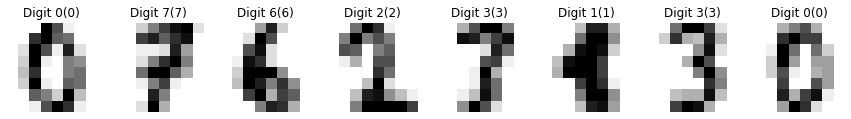

In [11]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=9)  # 9 trees as the figure

rf.fit(X_train, t_train)

train_score_rf = rf.score(X_train, t_train)
test_score_rf = rf.score(X_test, t_test)
print("Train Accuracy: {}, Test Accuracy: {}".format(train_score_rf, test_score_rf))

predicted_rf = rf.predict(X_test)

# Print out of numbers 
k = 8
_, axes = plt.subplots(1, k, figsize=(15,3))
for ax, image, label, pred in zip(axes, X_test[:k], t_test[:k], predicted_rf):
    
    ax.set_axis_off()
    ax.imshow(image.reshape((8,8)), cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Digit {}({})'.format(label, pred))

# Report 
print("\nClassification report for classifier %s:\n%s\n" % (rf, metrics.classification_report(t_test, predicted_rf)))

# Accuracy graph
here I would like to place a graph that maps all the prediction/accuracy scores side by side. Maybe even do like a heatmap in the submap format in the labs


In [12]:
# To print the values above the training (Blue) bar. 
def addlabelsTrain(x,y):
    for i in range(len(x)):
        plt.text(i- 0.2, y[i], y[i]) # - 0.2 place location 

In [13]:
# To print out the values above the test (orange) bar 
def addlabelsTest(x,y):
    for i in range(len(x)):
        plt.text(i+ 0.1, y[i], y[i])  # + 0.1 place location 

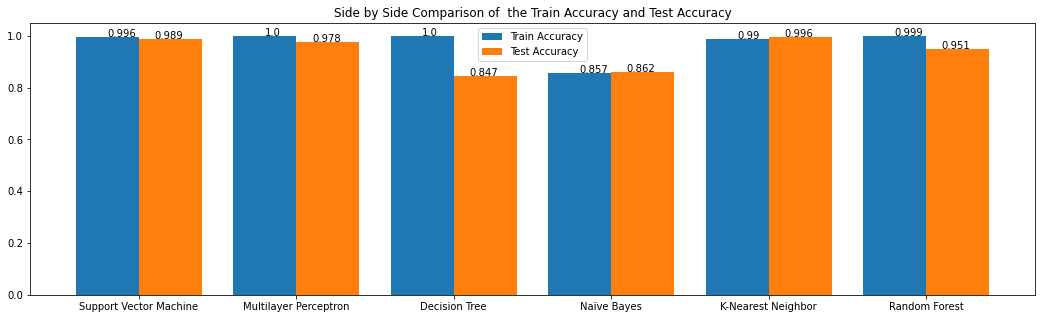

In [14]:
models = [svm_classifier, mlp, dt, nb, knn, rf] # To pass in the models that was created in each section

# This is to create a better visual name for each
names = ["Support Vector Machine", "Multilayer Perceptron", "Decision Tree", "Naïve Bayes", "K-Nearest Neighbor", "Random Forest"]

# Saving each of the train_scores and test_scores created in each 
train_accs = [train_score_svm, train_score_mlp, train_score_dt, train_score_nb, train_score_knn, train_score_rf]
test_accs = [test_score_svm, test_score_mlp, test_score_dt, test_score_nb, test_score_knn, test_score_rf]

# Arranging the names of the bar graph
X_axis_test = np.arange(len(names))

# Increasing the size, otherwise the x-axis is unreadable 
f, ax = plt.subplots(figsize=(18,5))
ax.set_title('Side by Side Comparison of  the Train Accuracy and Test Accuracy')

# rounding the numbers because otherwise it is unreadable
for i in range(len(train_accs)):
    train_accs[i] = round(train_accs[i], 3)
    
for i in range(len(test_accs)):
    test_accs[i] = round(test_accs[i], 3)

plt.bar(X_axis_test - 0.2, train_accs, 0.4, label = 'Train Accuracy',)
addlabelsTrain(X_axis_test - 0.2, train_accs)


plt.bar(X_axis_test + 0.2, test_accs, 0.4, label = 'Test Accuracy')
addlabelsTest(X_axis_test + 0.2, test_accs)

  
plt.xticks(X_axis_test, names)
plt.legend()
plt.show()

# Confusion Matrix
I wanted to plot the confusion matrix's for each model to see where each model is having issues. 

Model: Support Vector Machine


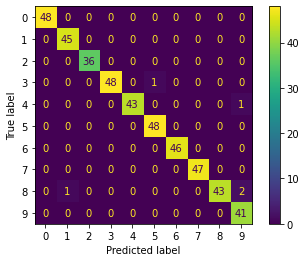

Model: Multilayer Perceptron


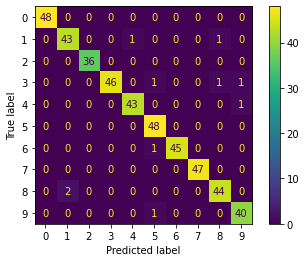

Model: Decision Tree


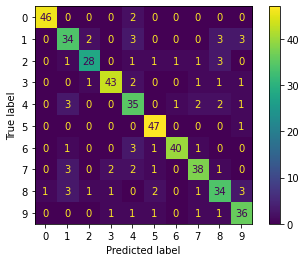

Model: Naïve Bayes


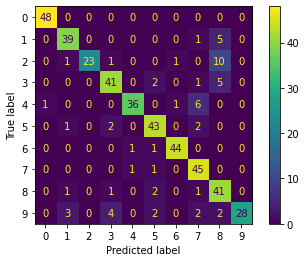

Model: K-Nearest Neighbor


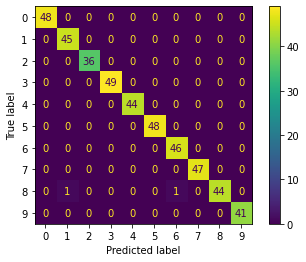

Model: Random Forest


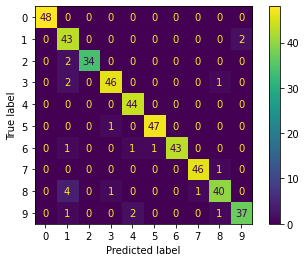

In [15]:
# Plotting Confusion matrix for each of our models to see where each is messing up
for name, model in zip(names, models):
    predictions = model.predict(X_test)
    
    cm = confusion_matrix(t_test, predictions, labels=model.classes_)
    print("Model:", name)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    
    disp.plot()

    plt.show()